Ce notebook applique le modèle VADER (rule-based) pour l'analyse de sentiments
sur les avis touristiques de Marrakech.

## Objectifs :
- Charger le dataset préprocessé
- Appliquer VADER pour prédire les sentiments (Positive / Negative / Neutral)
- Comparer les prédictions VADER avec les vrais labels
- Calculer les métriques : Accuracy, Precision, Recall, F1-score
- Visualiser la matrice de confusion
- Analyser quelques erreurs de prédiction

Les étapes de prétraitement lourdes (lemmatization, suppression des emojis, etc.)
ne sont pas appliquées car VADER exploite la ponctuation, les emojis et les majuscules.

In [12]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Téléchargement du lexique VADER
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hajja/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# Chargement des données
#df_text = pd.read_csv('../data/processed/X_train.csv')   # review_text ou cleaned_text
#df_label = pd.read_csv('../data/processed/y_train.csv') # sentiment

df = pd.read_csv('../data/raw/dataset_marrakech_english.csv')
df = df.dropna().reset_index(drop=True)

print(f"Taille du dataset : {df.shape}")
df.head()


Taille du dataset : (6282, 3)


,ID,review,sentiment_label
0,1,Just got back from Marrakech and I'm still ree...,Positive
1,2,"Meh, Jemaa el-Fna square was okay, I guess. To...",Neutral
2,3,The architecture in Marrakech is literally wow...,Positive
3,4,Got scammed by a taxi driver near Majorelle Ga...,Negative
4,5,"The locals were so friendly and welcoming, it ...",Positive


In [14]:
# Initialisation de VADER
sia = SentimentIntensityAnalyzer()

# Fonction de prédiction VADER
def vader_predict(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Application de VADER sur la colonne correcte
df['vader_sentiment'] = df['review'].apply(vader_predict)

# Aperçu des résultats
df[['review', 'sentiment_label', 'vader_sentiment']].head(10)


,review,sentiment_label,vader_sentiment
0,Just got back from Marrakech and I'm still ree...,Positive,Neutral
1,"Meh, Jemaa el-Fna square was okay, I guess. To...",Neutral,Positive
2,The architecture in Marrakech is literally wow...,Positive,Positive
3,Got scammed by a taxi driver near Majorelle Ga...,Negative,Positive
4,"The locals were so friendly and welcoming, it ...",Positive,Positive
5,"The heat in Marrakech is no joke, don't forget...",Neutral,Positive
6,"Our riad was adorable, but the noise from the ...",Neutral,Positive
7,Just had the best tagine of my life at a small...,Positive,Positive
8,"The Atlas Mountains were breathtaking, definit...",Positive,Positive
9,Jemaa el-Fna square at night is a whole differ...,Positive,Positive


In [15]:
y_true = df['sentiment_label']
y_pred = df['vader_sentiment']

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy VADER : {accuracy:.4f}\n")

print("Classification Report :\n")
print(classification_report(y_true, y_pred))


Accuracy VADER : 0.6071

Classification Report :

              precision    recall  f1-score   support

    Negative       0.58      0.60      0.59      1217
     Neutral       0.28      0.10      0.15      1726
    Positive       0.66      0.87      0.75      3339

    accuracy                           0.61      6282
   macro avg       0.51      0.52      0.50      6282
weighted avg       0.54      0.61      0.55      6282



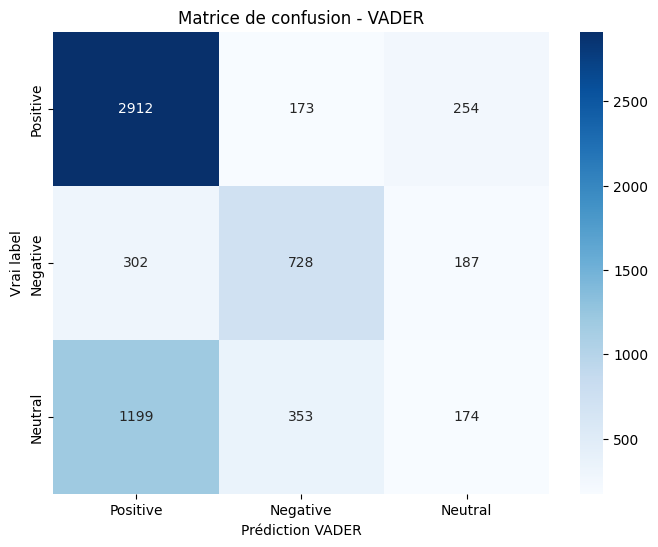

In [16]:
cm = confusion_matrix(
    y_true,
    y_pred,
    labels=['Positive', 'Negative', 'Neutral']
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Positive', 'Negative', 'Neutral'],
    yticklabels=['Positive', 'Negative', 'Neutral']
)

plt.title('Matrice de confusion - VADER')
plt.xlabel('Prédiction VADER')
plt.ylabel('Vrai label')
plt.show()


In [17]:
errors = df[df['sentiment_label'] != df['vader_sentiment']]

print(f"Nombre d'erreurs VADER : {len(errors)}\n")

errors.sample(10)[['review', 'sentiment_label', 'vader_sentiment']]

Nombre d'erreurs VADER : 2468



,review,sentiment_label,vader_sentiment
3926,"The locals in Marrakech are so hospitable, mad...",Positive,Neutral
3094,Just got back from Marrakech and I'm still ree...,Positive,Neutral
2190,"Be prepared for the heat, it's no joke, stay h...",Neutral,Positive
2509,Got scammed by a taxi driver on the way to the...,Negative,Neutral
3201,"The Atlas Mountains were gorgeous, but the hik...",Neutral,Positive
4211,"Be careful with the taxis, they'll try to rip ...",Negative,Positive
3743,"Our riad was beautiful, but the staff seemed a...",Neutral,Negative
4743,"Just experienced my first Moroccan hammam, it ...",Neutral,Positive
2195,"Our riad was beautiful, but the street noise w...",Neutral,Positive
1115,"Jemaa el-Fna square is chaotic, but in a good ...",Neutral,Positive


VADER - Test Set
              precision    recall  f1-score   support

    Negative       0.56      0.55      0.56       244
     Neutral       0.28      0.12      0.16       345
    Positive       0.65      0.86      0.74       668

    accuracy                           0.59      1257
   macro avg       0.50      0.51      0.49      1257
weighted avg       0.53      0.59      0.55      1257



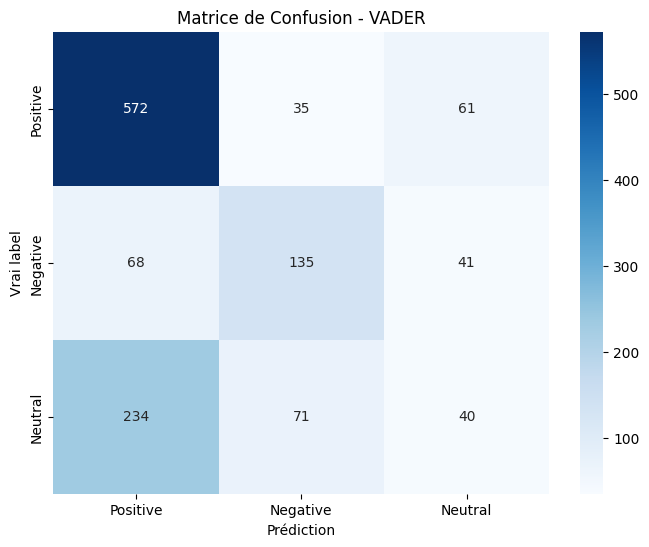

In [18]:


# Chargement des splits existants
X_test = pd.read_csv('../data/processed/X_test.csv')['review']
y_test = pd.read_csv('../data/processed/y_test.csv')['sentiment_label']

# Initialisation VADER


# Évaluation sur X_test
df_test = pd.DataFrame({'review': X_test, 'sentiment_label': y_test})
df_test['vader_sentiment'] = df_test['review'].apply(vader_predict)

y_true = df_test['sentiment_label']
y_pred = df_test['vader_sentiment']


print("VADER - Test Set")
print(classification_report(y_true, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=['Positive', 'Negative', 'Neutral'])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Matrice de Confusion - VADER')
plt.xlabel('Prédiction')
plt.ylabel('Vrai label')
plt.show()


In [19]:
df.to_csv('../data/processed/results_vader.csv', index=False)
print("Résultats VADER sauvegardés dans data/processed/results_vader.csv")

Résultats VADER sauvegardés dans data/processed/results_vader.csv


In [21]:
df_test.to_csv('../data/processed/results_vader_test.csv', index=False)
print("Résultats VADER sauvegardés dans data/processed/results_vader_test.csv")

Résultats VADER sauvegardés dans data/processed/results_vader_test.csv
